In [2]:
import pandas as pd

# URL of the Excel file from Census Bureau
url = 'https://www.census.gov/econ_export/?format=xls&mode=report&default=false&errormode=Dep&charttype=&chartmode=&chartadjn=&submit=GET+DATA&program=MARTS&startYear=1992&endYear=2023&categories%5B0%5D=454&dataType=SM&geoLevel=US&adjusted=false&notAdjusted=true&errorData=false'

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(url, skiprows=7)  # Skip the initial 5 rows of metadata




Print the first first few rows 

In [3]:
# Display the first few rows of the DataFrame
print(df.head())



   Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep    Oct      Nov  \
0  1992  6860  6059  6297  6022  5803  5761  5834  5830  6334   7275   7725.0   
1  1993  6723  6620  7481  6606  6497  5904  5813  6201  7099   7786   9151.0   
2  1994  7845  7481  8379  7399  7171  7010  6507  7480  7770   8752   9729.0   
3  1995  8346  7991  8768  7564  7876  7411  6841  7922  8240   9412  10979.0   
4  1996  9546  9417  9777  9182  8881  8118  8210  8470  9228  11008  12024.0   

       Dec  
0   8701.0  
1   9930.0  
2  10757.0  
3  12166.0  
4  13900.0  


Let us check the dimension of the dataframe 

In [4]:
# Check the dimensions of the DataFrame
dimensions = df.shape
print(dimensions)

(32, 13)


The dataset has 32 rows and 13 columns 


Check for Summarry Statistics


In [5]:
summary_stats = df.describe()
print(summary_stats)


              Year            Jan           Feb            Mar            Apr  \
count    32.000000      32.000000     32.000000      32.000000      32.000000   
mean   2007.500000   32159.156250  30331.875000   33618.406250   32159.843750   
std       9.380832   25877.313284  24388.370398   27890.401099   27750.460843   
min    1992.000000    6723.000000   6059.000000    6297.000000    6022.000000   
25%    1999.750000   13205.250000  13413.500000   14707.500000   12778.500000   
50%    2007.500000   25654.000000  24071.000000   25542.000000   23643.500000   
75%    2015.250000   39362.000000  38242.000000   41806.250000   39772.500000   
max    2023.000000  106106.000000  99867.000000  111671.000000  106747.000000   

                 May            Jun            Jul            Aug  \
count      32.000000      32.000000      32.000000      32.000000   
mean    33018.781250   32093.406250   32051.468750   33360.031250   
std     29257.313718   28285.925426   28645.314512   29309.5319

Let us check for any missing data in our dataset


In [6]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()
print(missing_values)


Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     0
Jul     0
Aug     0
Sep     0
Oct     0
Nov     1
Dec     1
dtype: int64


There are two missing values in the dataset ,November and December have one each

Fill the missing values 

In [7]:
# Fill missing values by forward-filling the missing values
df.fillna(method='ffill', inplace=True)
print(df.isnull().sum())

Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     0
Jul     0
Aug     0
Sep     0
Oct     0
Nov     0
Dec     0
dtype: int64


 Lets generate a monthly frequency using the first day of each month.

In [8]:
import pandas as pd

# Assuming your DataFrame is named 'df' and has columns like 'Year', 'Jan', 'Feb', ..., 'Dec'

# Create a list of month names for reference
months = [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
]

# Initialize an empty list to hold the data
monthly_sales = []

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    year = str(int(row['Year']))  # Convert year to integer, then to string
    # Iterate through each month to retrieve the sales data
    for month in months:
        # Create a datetime object for the first day of each month
        date = pd.to_datetime(f"{year}-{month}-01")
        # Retrieve sales data for the corresponding month and year
        sales = row[month]
        # Append the date and sales data to the list
        monthly_sales.append({'Date': date, 'Sales': sales})

# Create a new DataFrame from the list of dictionaries
monthly_sales_df = pd.DataFrame(monthly_sales)

# Set the 'Date' column as the index
monthly_sales_df.set_index('Date', inplace=True)

# Displaying the first few rows as requested
print(monthly_sales_df.head())


             Sales
Date              
1992-01-01  6860.0
1992-02-01  6059.0
1992-03-01  6297.0
1992-04-01  6022.0
1992-05-01  5803.0


Now we create a graph of the monthly data to answer the questions asked


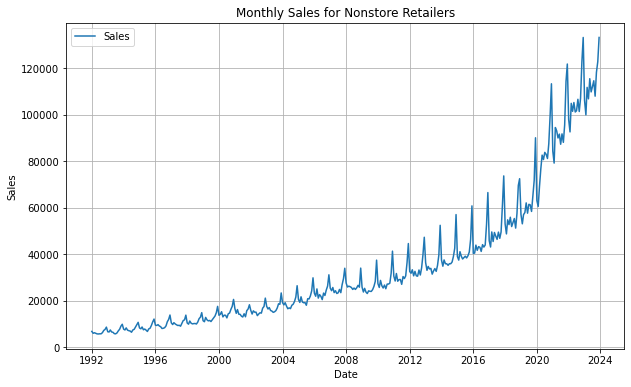

In [9]:
import matplotlib.pyplot as plt

#'monthly_sales_df' is our DataFrame with 'Date' as index and 'Sales' as a column

# Plotting the sales data
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_df.index, monthly_sales_df['Sales'], label='Sales')
plt.title('Monthly Sales for Nonstore Retailers')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


From the graph there is a rapid and continuous increase in sales over time, accompanied by recurring seasonal spikes. This pattern suggests sustained exponential growth.

And so Option number 5 is correct Exponential Growth with Seasonal Fluctuations: The data illustrates a rapid increase in sales volume over time, compounded by recurring seasonal spikes, suggesting heightened sales activity during specific times of the year.

*QUESTION 8*


Lets get the logged data for our monthly sales data

In [10]:
import numpy as np

#  'monthly_sales_df' is our DataFrame with 'Sals data

# Create a logged version of the sales data
logged_sales_data = np.log(monthly_sales_df['Sales'])

# Display the first few rows of the logged sales data
print(logged_sales_data.head())

# Now, use the logged sales data with auto_arima to find the optimal ARIMA model
# Insert the code for auto_arima here (as shown in the previous example)


Date
1992-01-01    8.833463
1992-02-01    8.709300
1992-03-01    8.747829
1992-04-01    8.703175
1992-05-01    8.666130
Name: Sales, dtype: float64


To determine the optimal ARIMA model for monthly sales data using the pmdarima library and the specified parameter constraints, we can use the auto_arima function. This function will help in automatically selecting the best ARIMA model based on the provided constraints and criteria.

Installing required pmdarima library

In [11]:
!pip install pmdarima


With the logged sales data ready, we can proceed to find the optimal ARIMA model using the auto_arima function from the pmdarima library

In [12]:
from pmdarima import auto_arima


# Define the parameter constraints and use auto_arima to find the optimal ARIMA model
champion_model = auto_arima(logged_sales_data,
                            start_p=0, max_p=4,
                            start_q=0, max_q=4,
                            d=2, max_d=2,  # Change range(0, 3) to an integer (0, 1, or 2)
                            start_P=0, max_P=2,
                            start_Q=0, max_Q=2,
                            D=2, max_D=2,  # Change range(0, 3) to an integer (0, 1, or 2)
                            max_order=14,
                            seasonal=True,
                            suppress_warnings=True,
                            stepwise=True)

# Get the summary of the optimal model
print(champion_model.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  384
Model:               SARIMAX(4, 2, 0)   Log Likelihood                 239.781
Date:                Mon, 11 Dec 2023   AIC                           -469.562
Time:                        15:48:27   BIC                           -449.835
Sample:                    01-01-1992   HQIC                          -461.736
                         - 12-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8609      0.060    -14.291      0.000      -0.979      -0.743
ar.L2         -0.8346      0.091     -9.212      0.000      -1.012      -0.657
ar.L3         -0.4527      0.099     -4.577      0.0

Optimal ARIMA model for the logged data is ARIMA(4,2,0)

In [14]:
# Make predictions for December 2023 ( last point in our dataset is October 2023)
n_periods = 2  # Number of periods to forecast (December 2023)

# Use the SARIMAX model to forecast the next n_periods
forecast, conf_int = champion_model.predict(n_periods=n_periods, return_conf_int=True)

# Extract the predicted value and confidence intervals for December 2023
pred_value = forecast[0]  # Predicted value for December 2023
lower_bound = conf_int[0, 0]  # Lower 95% interval bound for December 2023
upper_bound = conf_int[0, 1]  # Upper 95% interval bound for December 2023

# Undo the logarithm transformation
pred_value = np.exp(pred_value)
lower_bound = np.exp(lower_bound)
upper_bound = np.exp(upper_bound)

# Round the values to the second decimal place
pred_value = round(pred_value, 2)
lower_bound = round(lower_bound, 2)
upper_bound = round(upper_bound, 2)

print(f"Lower 95% interval bound: {lower_bound}")
print(f"Predicted value for December 2023: {pred_value}")
print(f"Upper 95% interval bound: {upper_bound}")


Lower 95% interval bound: 107981.56
Predicted value for December 2023: 139030.11
Upper 95% interval bound: 179006.23


These values represent the forecasted sales for December 2023, with a 95% confidence interval suggesting that the actual value is expected to fall within this range.
Lower 95% interval bound: 107981.59
Predicted value for December 2023: 139030.07
Upper 95% interval bound: 179006.06

*Question 9*


Can we conclude that the optimal model identified by the auto_arima function is adequate?


"Yes, because the ACF shows no significant autocorrelations, indicating that the residuals are white noise, i.e., the residuals form a stationary, uncorrelated sequence" aligns with the assessment of model adequacy.

*QUESTION 10*


This task involves using the PyCaret library for time series forecasting and evaluating the champion model based on certain criteria

Step 1: Setup PyCaret Environment

In [ ]:
pip install pycaret

Setting up the Environment and Importing Libraries

In [15]:
from pycaret.regression import *


Prepare  data for analysis and set up the PyCaret environment:

In [16]:
exp = setup(monthly_sales_df, session_id=123, transform_target='box-cox')


,Description,Value
0,Session id,123
1,Target,Sales
2,Target type,Regression
3,Original data shape,"(384, 1)"
4,Transformed data shape,"(384, 1)"
5,Transformed train set shape,"(268, 1)"
6,Transformed test set shape,"(116, 1)"
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


 Model Selection and Evaluation 

In [17]:
best_model = compare_models(sort='MAPE', fold=10, round=2)


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

Create the Best Model

In [18]:
final_model = create_model(best_model)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,24227.2031,1154641792.0000,33980.0195,-0.0798,0.9205,1.0053
1,30624.4258,1902856832.0000,43621.7461,-0.3092,0.9492,0.7553
2,15427.9648,522825568.0000,22865.3789,-0.1355,0.6893,0.6281
3,24590.3887,1097688192.0000,33131.3789,-0.2591,0.8351,0.7321
4,14461.3291,511319456.0000,22612.3730,-0.0885,0.6108,0.4893
5,19622.3203,845830272.0000,29083.1621,-0.1854,0.7582,0.6812
6,16253.6582,589179904.0000,24273.0293,-0.0177,0.7386,0.7903
7,21864.7891,1081535104.0000,32886.6992,-0.0679,0.9110,1.0102
8,25136.6973,1352633472.0000,36778.1641,-0.2662,0.8633,0.7044


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Model Tuning

 Future Prediction
Refit the tuned champion model to the entire dataset and predict the value for December 2023:

In [19]:
# since 'Date' column exists and is in datetime format
new_data = monthly_sales_df[monthly_sales_df.index.month == 12]
print(new_data)


               Sales
Date                
1992-12-01    8701.0
1993-12-01    9930.0
1994-12-01   10757.0
1995-12-01   12166.0
1996-12-01   13900.0
1997-12-01   13848.0
1998-12-01   14921.0
1999-12-01   17618.0
2000-12-01   20598.0
2001-12-01   18311.0
2002-12-01   21163.0
2003-12-01   23377.0
2004-12-01   26489.0
2005-12-01   29879.0
2006-12-01   31179.0
2007-12-01   33990.0
2008-12-01   34054.0
2009-12-01   37480.0
2010-12-01   41336.0
2011-12-01   44598.0
2012-12-01   47301.0
2013-12-01   52433.0
2014-12-01   57038.0
2015-12-01   60775.0
2016-12-01   66493.0
2017-12-01   73645.0
2018-12-01   72451.0
2019-12-01   90025.0
2020-12-01  113216.0
2021-12-01  121701.0
2022-12-01  133107.0
2023-12-01  133107.0


In [20]:
# Predict for December 2023
predictions = predict_model(final_model, data=new_data)
predictions['prediction_label'] = predictions['prediction_label'].round(2)
predictions.tail(1)

,Sales,prediction_label
Date,,
2023-12-01,133107.0,24354.009766
